In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the dataset
data_path = 'C:\\Users\\dvesh\\OneDrive\\Desktop\\ShadowFox\\ShadowFox\\Task1\\HousingData.csv'
df = pd.read_csv(data_path)

In [17]:
# Display basic information about the dataset
print(df.head())
print(df.info())
print(df.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float6

In [18]:

# Handle missing values if any
df = df.dropna()

In [19]:
# Define feature columns and target column
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [20]:

# Remove potential outliers using z-score
from scipy import stats
z = np.abs(stats.zscore(X))
X = X[(z < 3).all(axis=1)]
y = y[X.index]

In [21]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
# Add polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [24]:

# Choose the regression model
model = LinearRegression()


In [25]:

# Train the model
model.fit(X_train_poly, y_train)


LinearRegression()

In [26]:

# Make predictions
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

In [27]:

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

In [28]:
print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Training R^2: {train_r2}')
print(f'Test R^2: {test_r2}')

Training RMSE: 1.581915716726406
Test RMSE: 4.576401367322184
Training R^2: 0.963134050169501
Test R^2: 0.5693599095603528


In [29]:
# Ridge regression for regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
ridge_pred_test = ridge.predict(X_test_poly)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred_test))
ridge_r2 = r2_score(y_test, ridge_pred_test)

In [30]:

print(f'Ridge Test RMSE: {ridge_rmse}')
print(f'Ridge Test R^2: {ridge_r2}')

Ridge Test RMSE: 4.558509387427131
Ridge Test R^2: 0.5727206034388548


In [31]:
# Lasso regression for regularization
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_poly, y_train)
lasso_pred_test = lasso.predict(X_test_poly)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred_test))
lasso_r2 = r2_score(y_test, lasso_pred_test)

print(f'Lasso Test RMSE: {lasso_rmse}')
print(f'Lasso Test R^2: {lasso_r2}')

Lasso Test RMSE: 4.392871412358803
Lasso Test R^2: 0.6032077086861428


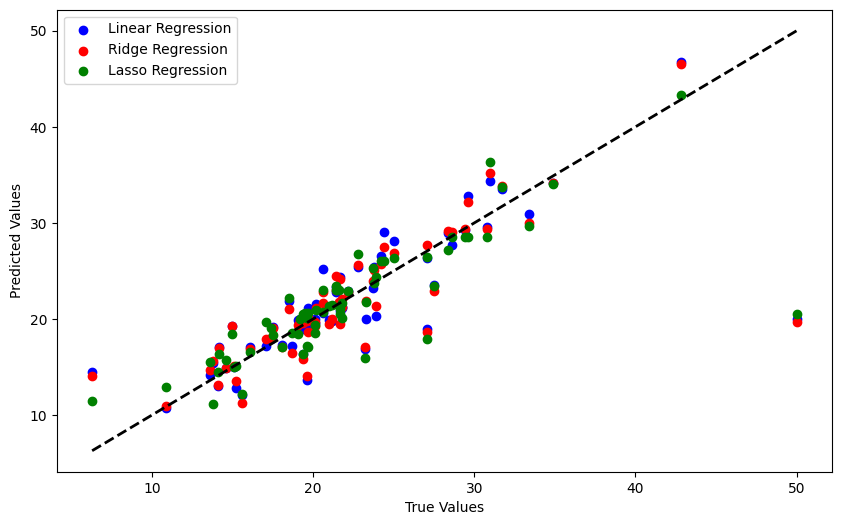

In [32]:

# Visualization of results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Linear Regression')
plt.scatter(y_test, ridge_pred_test, color='red', label='Ridge Regression')
plt.scatter(y_test, lasso_pred_test, color='green', label='Lasso Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()